## Using Deep_AutoML for Plant Disease Dataset

In [1]:
!pip install deep_autoviml

     |████████████████████████████████| 139 kB 4.2 MB/s 
     |████████████████████████████████| 14.5 MB 32 kB/s 
     |████████████████████████████████| 454.4 MB 9.1 kB/s 
     |████████████████████████████████| 23.2 MB 1.2 MB/s 
     |████████████████████████████████| 308 kB 61.2 MB/s 
     |████████████████████████████████| 170 kB 63.1 MB/s 
     |████████████████████████████████| 4.3 MB 55.2 MB/s 
     |████████████████████████████████| 462 kB 59.6 MB/s 
     |████████████████████████████████| 1.2 MB 13.6 MB/s 
     |████████████████████████████████| 4.0 MB 43.6 MB/s 
     |████████████████████████████████| 209 kB 75.7 MB/s 
     |████████████████████████████████| 80 kB 10.6 MB/s 
     |████████████████████████████████| 75 kB 5.0 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 144 kB 61.9 MB/s 
     |████████████████████████████████| 111 kB 48.3 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 s

In [2]:
#Importing libraries
from deep_autoviml import deep_autoviml as deepauto
import pandas as pd


Imported deep_auto_viml. version=0.0.68
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [3]:

# Download a file based on its file ID.
file_id = '18DbC6Xj4NP-hLzI14WuMaAEyq482vNfn'

# Download dataset
!gdown https://drive.google.com/uc?id={file_id}

# Unzip the downloaded file
!unzip -q PlantVillage.zip

!mv ./PlantVillage/val ./PlantVillage/test



Downloading...
From: https://drive.google.com/uc?id=18DbC6Xj4NP-hLzI14WuMaAEyq482vNfn
To: /content/PlantVillage.zip
100% 866M/866M [00:10<00:00, 85.2MB/s]


In [4]:
!mkdir -p ./PlantVillageFiltered/train
!cp -r ./PlantVillage/train/Apple___Apple_scab/ ./PlantVillageFiltered/train
!cp -r ./PlantVillage/train/Apple___Black_rot ./PlantVillageFiltered/train
!cp -r ./PlantVillage/train/Apple___Cedar_apple_rust ./PlantVillageFiltered/train
!cp -r ./PlantVillage/train/Apple___healthy ./PlantVillageFiltered/train

!mkdir -p ./PlantVillageFiltered/test
!cp -r ./PlantVillage/test/Apple___Apple_scab ./PlantVillageFiltered/test
!cp -r ./PlantVillage/test/Apple___Black_rot ./PlantVillageFiltered/test
!cp -r ./PlantVillage/test/Apple___Cedar_apple_rust ./PlantVillageFiltered/test
!cp -r ./PlantVillage/test/Apple___healthy ./PlantVillageFiltered/test

In [5]:

image_dir = './PlantVillageFiltered'
target = 'image'
img_height = 224
img_width = 224
img_channels = 3

project_name = "plants"
keras_model_type = "image"
keras_options = {"early_stopping": True, 'lr_scheduler': 'rlr', "epochs": 3}
model_options = {'tuner':"storm", "max_trials":1, 'cat_feat_cross_flag':True, 
                 'image_directory': image_dir, 'image_height': img_height, 
                 'image_width':img_width, 'image_channels':img_channels }



    Only CPU found on this device
Setting CPU strategy using 1 devices
    Image directory given as ./PlantVillageFiltered
For image use case:
    Image height given as 224
    Image width given as 224
    Image channels given as 3
No validation folder found under given image directory ./PlantVillageFiltered. Returning...
Found 2536 files belonging to 4 classes.

Splitting train into two: train and validation data
Number of image classes = 4 and they are: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']
Training image model. This will take time...
Epoch 1/3
20/20 [==============================] - 63s 3s/step - loss: 1.1364 - accuracy: 0.5804 - val_loss: 0.5714 - val_accuracy: 0.8086
Epoch 2/3
20/20 [==============================] - 50s 3s/step - loss: 0.5157 - accuracy: 0.8304 - val_loss: 0.3293 - val_accuracy: 0.8867
Epoch 3/3
8/8 [==============================] - 14s 2s/step - loss: 0.2244 - accuracy: 0.9336
    Model accuracy in Image val

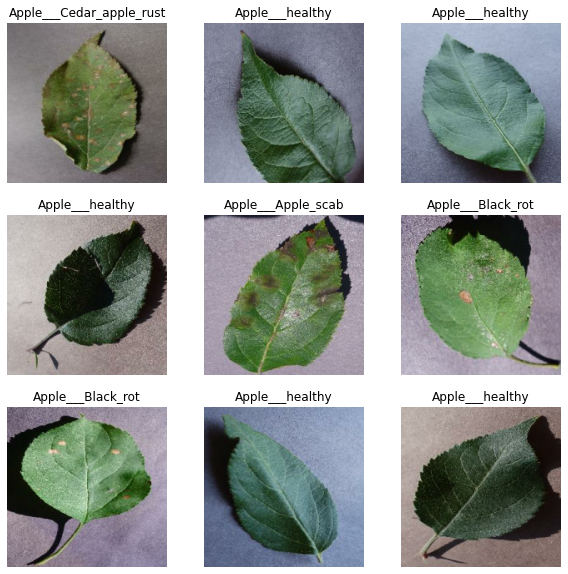

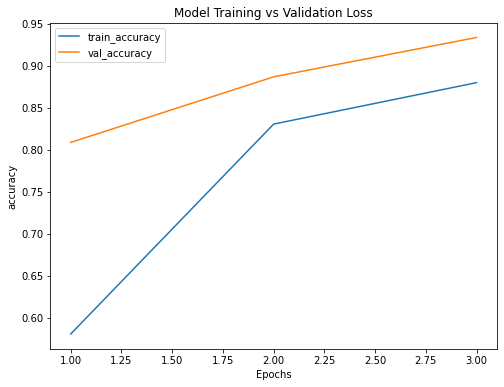

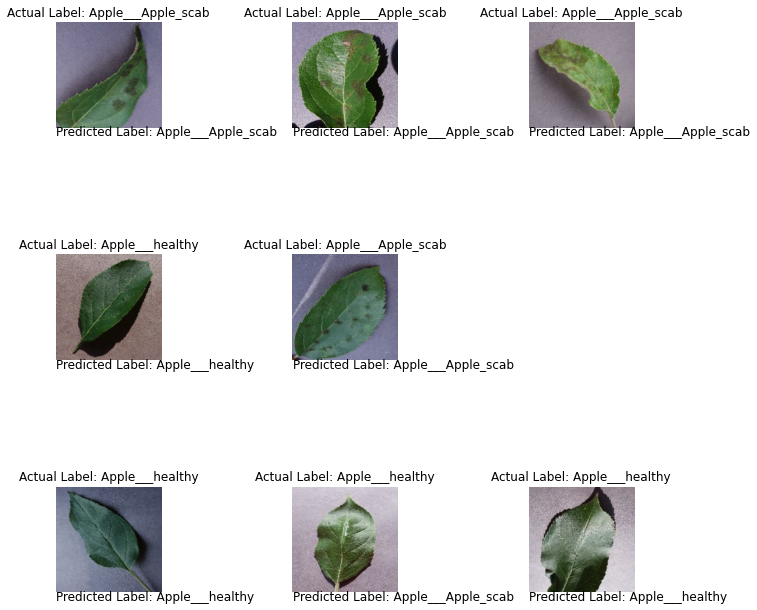

In [11]:
model, dic = deepauto.fit("", target, keras_model_type=keras_model_type, 
                            project_name=project_name, save_model_flag=True, 
                            model_options=model_options, keras_options=keras_options, 
                            use_my_model="", verbose=1)

In [12]:
#Inference on the test data
test_image_dir = './PlantVillageFiltered/test' 
predictions = deepauto.predict_images(test_image_dir, model, dic, keras_model_type="image")
print(predictions)


Loading deep_autoviml model from <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f3598b95a10> folder. This will take time...

Using <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f3598b95a10> model provided as input...
Time taken to load saved model = 0 seconds
    loading and predicting on folder: ./PlantVillageFiltered/test
Found 635 files belonging to 4 classes.
    Sample predictions before inverse_transform: [3 3 0 0 3]
    Sample predictions after inverse_transform: ['Apple___healthy' 'Apple___healthy' 'Apple___Apple_scab'
 'Apple___Apple_scab' 'Apple___healthy']
[array([[0.012, 0.003, 0.002, 0.983],
       [0.017, 0.008, 0.017, 0.958],
       [0.896, 0.026, 0.01 , 0.068],
       ...,
       [0.245, 0.055, 0.12 , 0.58 ],
       [0.038, 0.899, 0.04 , 0.023],
       [0.014, 0.005, 0.039, 0.942]], dtype=float32), array(['Apple___healthy', 'Apple___healthy', 'Apple___Apple_scab',
       'Apple___Apple_scab', 'Apple___healthy', 'Apple___Apple_sc